In [4]:
from numpy import *
from matplotlib.pyplot import *
%matplotlib inline

from astropy.io import ascii

from scipy.integrate import quad
from scipy.interpolate import interp1d

In [5]:
ascii.read('TAKEMEHOME_PY.txt', data_start = 2)

type,time,latitude,longitude,altitude (m),speed (km/h),course,sat,hdop,eos,name
str1,str19,float64,float64,float64,float64,float64,int32,float64,int32,int32
T,2018-12-08 23:47:08,37.949115,-120.794978333,88.0,0.3,74.7,6,1.1,--,--
T,2018-12-08 23:47:09,37.949115,-120.794978333,88.0,0.0,74.7,6,1.1,--,--
T,2018-12-08 23:47:10,37.949115,-120.794978333,88.0,0.0,74.7,6,1.1,--,--
T,2018-12-08 23:47:11,37.949115,-120.794978333,88.0,0.0,74.7,6,1.1,--,--
T,2018-12-08 23:47:12,37.949115,-120.794978333,88.0,0.0,74.7,6,1.1,--,--
T,2018-12-08 23:47:13,37.949115,-120.794978333,88.0,0.0,74.7,6,1.1,--,--
T,2018-12-08 23:47:14,37.949115,-120.794978333,88.0,0.0,74.7,6,1.1,--,--
T,2018-12-08 23:47:15,37.949115,-120.794978333,88.0,0.0,74.7,6,1.1,--,--
T,2018-12-08 23:47:16,37.949115,-120.794978333,88.0,0.0,74.7,6,1.1,--,--


In [6]:
gps = ascii.read('TAKEMEHOME_PY.txt', data_start = 2)

In [7]:
from datetime import datetime

In [8]:
t = gps["time"]

x = gps["latitude"]
y = gps["longitude"]

alt = gps["altitude (m)"]

In [9]:
time = []
for i in range(1, len(t)-1):
    time.append(datetime.strptime(t[i], "%Y-%m-%d %H:%M:%S"))

In [10]:
print time[0].hour

23


In [11]:
flightTimeSec = []
for i in range(651, 750):
    flightTimeSec.append(i-651)

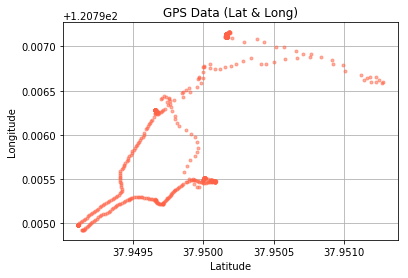

In [12]:
plot(x, -1*y, ".", alpha = .5, c = "tomato")
xlabel("Latitude")
ylabel("Longitude")
title("GPS Data (Lat & Long)")
grid()

In [13]:
mLat = (x[-1] - x[0])*111111
mLong = (y[-1] - y[0])*111111*cos(x[-1])
print "Final distance differences in x and y (m): ", mLat, mLong
mDist = sqrt(mLat**2 + mLong**2)
print "Difference between GPS reciever and build site (m): ", mDist
print "Pretty accurate results, off by about 2 meters"

Final distance differences in x and y (m):  2.9629970370224754 5.382800410279765
Difference between GPS reciever and build site (m):  6.144419557477498
Pretty accurate results, off by about 2 meters


In [14]:
xMeters = []
yMeters = []
for i in range(1, len(x)):
    xMeters.append(abs(((x[i-1] - x[0])*111111))-117)
    yMeters.append(abs(((y[i-1] - y[0])*111111*cos(x[i-1])))-233)

Text(0.5,1,'GPS Data (meters)')

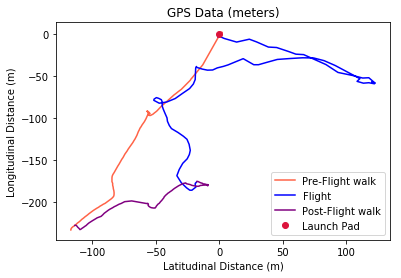

In [15]:
plot(xMeters[:650], yMeters[:650], c = "tomato", label = "Pre-Flight walk")
plot(xMeters[651:750], yMeters[651:750], c = "blue", label = "Flight")
plot(xMeters[750:], yMeters[750:], c = "purple", label = "Post-Flight walk")
plot(0, 0, ".", c = "crimson", markersize = 12, label = "Launch Pad")
legend(loc = "lower right")
xlabel("Latitudinal Distance (m)")
ylabel("Longitudinal Distance (m)")
title("GPS Data (meters)")

In [16]:
course = gps["course"]

Text(0.5,1,'TMH Course')

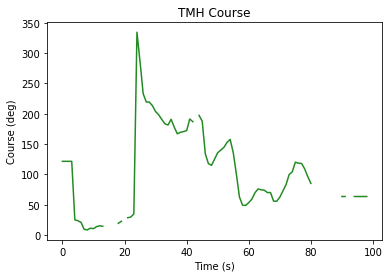

In [17]:
plot(flightTimeSec, course[651:750], c = "forestgreen")
xlabel("Time (s)")
ylabel("Course (deg)")
title("TMH Course")

In [18]:
courseX = []
courseY = []
for i in range(0, len(flightTimeSec)):
    courseX.append(cos(course[i]))
    courseY.append(sin(course[i]))

c:\python27\lib\site-packages\numpy\core\numeric.py:553: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)


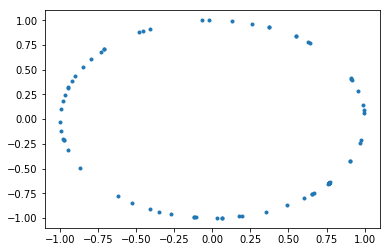

In [19]:
plot(courseX, courseY, ".")